In [29]:
import numpy as np
import scipy as sp

def genran(a,b,m,xant):
    xsig = (a*xant + b) % m
    usig = xsig / m
    return [xsig,usig]

def genranN(a,b,m,x0,N):
    xant = x0
    I=[]
    X=[]
    U=[]
    for t in range(1, N+1):
        [xi,ui] = genran(a,b,m,xant)
        I.append(t)
        X.append(xi)
        U.append(ui)
        xant = xi
    return [I,X,U]

def genvardiscret(U,X,P):
    V = []
    for t in range(0, len(U)):
        for t2 in range(0, len(X)):
            if U[t]<=P[t2]:
                V.append(X[t2])
                break
    return V

def tam_ciclo(values):
    tam = 1
    max_len = int(len(values) / 2)
    for ii in range(2, max_len):
        if (values[0:ii] == values[ii:2*ii]).any() :
            return ii
    
    return tam

def showValues(I,X,U):
    print("i\tXi\tUi")
    for t in range(0, len(X)):
        print("%d\t%d\t%2.4f" % (I[t],X[t],U[t]), sep=' ', end='\n')

## 1.
Si $x_0=3$ y
$$x_n = (5x_{n-1}+7) \mod 200$$

**a)** encuentre $x_1,...,x_{100}$

In [30]:
a = 5.0
b = 7.0
m = 200.0
x0 = 3.0
N = 100
[I,X,U] = genranN(a,b,m,x0,N)
showValues(I,X,U)

i	Xi	Ui
1	22	0.1100
2	117	0.5850
3	192	0.9600
4	167	0.8350
5	42	0.2100
6	17	0.0850
7	92	0.4600
8	67	0.3350
9	142	0.7100
10	117	0.5850
11	192	0.9600
12	167	0.8350
13	42	0.2100
14	17	0.0850
15	92	0.4600
16	67	0.3350
17	142	0.7100
18	117	0.5850
19	192	0.9600
20	167	0.8350
21	42	0.2100
22	17	0.0850
23	92	0.4600
24	67	0.3350
25	142	0.7100
26	117	0.5850
27	192	0.9600
28	167	0.8350
29	42	0.2100
30	17	0.0850
31	92	0.4600
32	67	0.3350
33	142	0.7100
34	117	0.5850
35	192	0.9600
36	167	0.8350
37	42	0.2100
38	17	0.0850
39	92	0.4600
40	67	0.3350
41	142	0.7100
42	117	0.5850
43	192	0.9600
44	167	0.8350
45	42	0.2100
46	17	0.0850
47	92	0.4600
48	67	0.3350
49	142	0.7100
50	117	0.5850
51	192	0.9600
52	167	0.8350
53	42	0.2100
54	17	0.0850
55	92	0.4600
56	67	0.3350
57	142	0.7100
58	117	0.5850
59	192	0.9600
60	167	0.8350
61	42	0.2100
62	17	0.0850
63	92	0.4600
64	67	0.3350
65	142	0.7100
66	117	0.5850
67	192	0.9600
68	167	0.8350
69	42	0.2100
70	17	0.0850
71	92	0.4600
72	67	0.3350
73	142	0.7100
74	117	0.5850
75

**b)** el tamaño del ciclo (si lo tiene)

In [31]:
print("El tamaño del ciclo es: "+str(tam_ciclo((np.array(X)).astype(int))))

El tamaño del ciclo es: 8


**c)** calcule el estadístico $\chi^2$

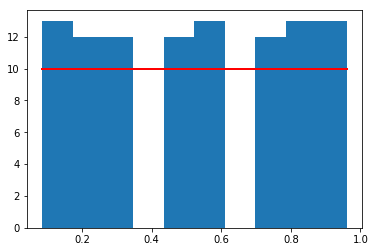

Estadístico chi2 = 25.199999999999996
25.2


In [32]:
import matplotlib.pyplot as plt
from scipy import stats

k=10
count, bins, ignored = plt.hist(U, k, normed=False)
plt.plot(bins, np.ones_like(bins)*(N/k), linewidth=2, color='r')
plt.show()

chiest=0
for i in range(0,k):
    chiest = chiest + ((count[i]-(N/k))**2)/(N/k)
print("Estadístico chi2 = "+str(chiest))

chisq, pvalue = stats.chisquare(count, f_exp=np.ones_like(count)*(N/k))
print(chisq)

## 2.

Dada la función $f(x) = -4x^6 + 5x^2 - x + 1$:

1. Calcule el área bajo la curva usando el método de Monte Carlo generando 1.000 y 1.000.000 puntos $(x,y)$ aleatorios. Para ello use sus propios generadores congruenciales de numeros pseudoaleatorios uniformes $U(0,1)$, tal que genere puntos $(x,y)$ para el rango $x = [-1,1]$ y $y =[0,max(f(x))]$.
2. Grafique la función y los puntos $(x,y)$ aleatorios generados.
3. Calcule el error en comparación con el valor de la solución analítica.

_Rta:_

Para 1000

In [33]:
# Metodo de monte carlo para calcular el area bajo la curva de la funcion
%matplotlib inline 

import math
import random
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -4*math.pow(x,6)+5*math.pow(x,2)- x + 1

xmin = -1.0
xmax = 1.0

# Encuentra el ymax
numPasos = 1000 
ymin = 0
ymax = ymin
for i in range(numPasos):
    x = xmin + (xmax - xmin) * float(i) / numPasos
    y = f(x)
    if y < ymin: ymin = y
    if y > ymax: ymax = y

# Monte Carlo
rectArea = (xmax - xmin) * (ymax - ymin)
numPuntos = 1000
ct = 0

Xr=[]
Yr=[]
Xb=[]
Yb=[]

for j in range(numPuntos):
    x = xmin + (xmax - xmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    ##if f(x) > 0 and y > 0 and y <= f(x):
    if x>=-1 and x<=1 and y <= f(x):
        ct += 1
        Xr.append(x)
        Yr.append(y)
    else:
        Xb.append(x)
        Yb.append(y)

MCArea = rectArea * float(ct) / numPuntos
print("Area bajo la curva = " + str(MCArea))

Area bajo la curva = 4.260537179224978


/Users/angelcruz-roa/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


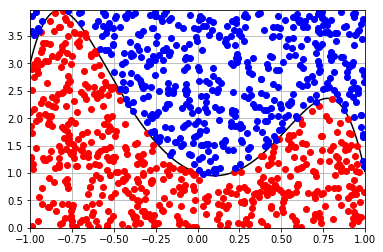

In [34]:
# Graficar
xx = np.arange(xmin,xmax,(xmax-xmin)/numPasos)
yy=[]

for xi in xx:
    yy.append(f(xi))
plt.plot(xx,yy,color="black")
plt.plot(Xr, Yr, color="red",linewidth=0, marker='o', lw=1 )
plt.plot(Xb, Yb, color="blue",linewidth=0, marker='o', lw=1 )

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.grid(True) 
plt.show()

Solución analítica

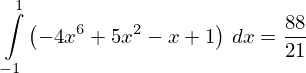

In [35]:
from sympy import *
from sympy import init_printing
init_printing() 

x = Symbol('x')

aa=Integral((-4*x**6+5*x**2 - x + 1), (x, -1, 1))

Eq(aa, aa.doit())

In [36]:
Err = 88/21 - MCArea
print("Area estimada usando MC: ", MCArea)
print("Area calculada a partir de la integral: ", 88/21)
print("Error: ",Err)

Area estimada usando MC:  4.260537179224978
Area calculada a partir de la integral:  4.190476190476191
Error:  -0.07006098874878752


Para 1000000

In [37]:
# Metodo de monte carlo para calcular el area bajo la curva de la funcion
%matplotlib inline 

import math
import random
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -4*math.pow(x,6)+5*math.pow(x,2)- x + 1

xmin = -1.0
xmax = 1.0

# Encuentra el ymax
numPasos = 1000 
ymin = 0
ymax = ymin
for i in range(numPasos):
    x = xmin + (xmax - xmin) * float(i) / numPasos
    y = f(x)
    if y < ymin: ymin = y
    if y > ymax: ymax = y

# Monte Carlo
rectArea = (xmax - xmin) * (ymax - ymin)
numPuntos = 1000000
ct = 0

Xr=[]
Yr=[]
Xb=[]
Yb=[]

for j in range(numPuntos):
    x = xmin + (xmax - xmin) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    ##if f(x) > 0 and y > 0 and y <= f(x):
    if x>=-1 and x<=1 and y <= f(x):
        ct += 1
        Xr.append(x)
        Yr.append(y)
    else:
        Xb.append(x)
        Yb.append(y)

MCArea = rectArea * float(ct) / numPuntos
print("Area bajo la curva = " + str(MCArea))

Area bajo la curva = 4.191638659924438


/Users/angelcruz-roa/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


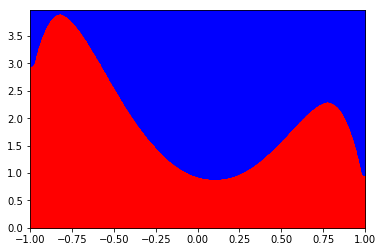

In [38]:
# Graficar
xx = np.arange(xmin,xmax,(xmax-xmin)/numPasos)
yy=[]

for xi in xx:
    yy.append(f(xi))
plt.plot(xx,yy,color="black")
plt.plot(Xr, Yr, color="red",linewidth=0, marker='o', lw=1 )
plt.plot(Xb, Yb, color="blue",linewidth=0, marker='o', lw=1 )

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.grid(True) 
plt.show()

Solución analítica

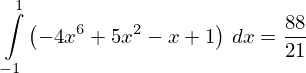

In [39]:
from sympy import *
from sympy import init_printing
init_printing() 

x = Symbol('x')

aa=Integral((-4*x**6+5*x**2 - x + 1), (x, -1, 1))

Eq(aa, aa.doit())

In [40]:
Err = 88/21 - MCArea
print("Area estimada usando MC: ", MCArea)
print("Area calculada a partir de la integral: ", 88/21)
print("Error: ",Err)

Area estimada usando MC:  4.191638659924438
Area calculada a partir de la integral:  4.190476190476191
Error:  -0.001162469448247272


## 3.
Escriba un programa para generar $n$ valores a partir de la funcion de masa de probabilidad $p_1 = 1/4$ para $x_1$, y $p_2 = 3/4$ para $x_2$ <br>
(a) Sea $n = 100$, ejecute el programa y determine la proporcion de valores que sean iguales a 2.<br>
(b) Repita (a) con $n = 1000$.<br>
(c) Repita (a) con $n = 10000$.

_Rta:_

(a) Sea $n = 100$, ejecute el programa y determine la proporcion de valores que sean iguales a 2.

In [41]:
from datetime import datetime

Xo = datetime.now().microsecond

X=[1,2]
p=[1/4,3/4]

X=np.array(X)
p=np.array(p)
P=p.cumsum()

N=100
[II,XX,U] = genranN(25214903917,11,(2**48)-1, Xo,N)
V=genvardiscret(U,X,P)
print(p)
print("Proporcion X=2: ",V.count(2)/N)

[0.25 0.75]
Proporcion X=2:  0.73


(b) Repita (a) con $n = 1000$.

In [42]:
N=1000
[II,XX,U] = genranN(25214903917,11,(2**48)-1, Xo,N)
V=genvardiscret(U,X,P)
print(p)
print("Proporcion X=2: ",V.count(2)/N)

[0.25 0.75]
Proporcion X=2:  0.757


(c) Repita (a) con $n = 10000$.

In [43]:
N=10000
[II,XX,U] = genranN(25214903917,11,(2**48)-1, Xo,N)
V=genvardiscret(U,X,P)
print(p)
print("Proporcion X=2: ",V.count(2)/N)

[0.25 0.75]
Proporcion X=2:  0.7537


## 4. 
Se tiene un sistema de línea de espera con un servidor y capacidad infinita (Modelo de Colas G/G/1) (Ver [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ), en el cual tanto los tiempos de llegada entre clientes, así como los tiempos de atención del servidor se comportan como  variables aleatorias generadas de distribuciones de probabilidad exponenciales, en donde en promedio llegan A clientes por minuto al sistema y el servidor atiende en promedio B clientes por minuto. La simulación inicia en el tiempo $t=0$ y se deja de permitir el ingreso de mas clientes en el sistema en el tiempo $T=100$.

Para analizar el sistema Ud. debe usar la implementación de acuerdo con el Modelo de Colas G/G/1 visto en clase (diapositivas 42 y 43 [Presentación](https://docs.google.com/presentation/d/17sB_GJVIu0vJYJXovaJNdLuBMENwHMW2L9Sa58P89Uw) ). 

Para la generación de las variables aleatorias con distribución exponencial debe usar el método de la inversión para variables aleatorias continuas usando generadores congruenciales mixtos. _Ayuda: El método de inversión para variables aleatorias continuas debe usar la función inversa $F^{-1}(p)$ de la distribución de probabilidad acumulada de la distribución exponencial en donde el valor $p$ proviene del generador congruencial mixto_.

Para la generación de las variables aleatorias de los tiempos entre las llegadas de clientes (variable aleatoria $X$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = A$ a partir de un generador congruencial _Numerical Recipes_ (i.e. $a = 1664525$, $c = 1013904223$, $m=2^{32}$) y semilla $X_0 = 987654321$.

Para la generación de las variables aleatorias de los tiempos de atención del servidor (variable aleatoria $Y$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = B$ a partir de un generador congruencial Turbo Pascal (i.e. $a = 134775813$, $c = 1$, $m=2^{32}$) y semilla $X_0 = 123456789$.

Con su implementación para $A=2.5$ y $B=6$ por favor responda lo siguiente:

**a)** Tiempo promedio de los clientes en el sistema.

**b)** Tiempo promedio de los clientes en la cola.

**c)** Tiempo transcurrido desde $T$ hasta que el último cliente abandona el sistema.

**d)** Número máximo de clientes en el sistema durante la simulación.

**e)** Total de clientes que pasaron por el sistema

**f)** Grafique el número de clientes en el sistema (eje Y) con respecto al tiempo (eje X).

In [44]:
%matplotlib inline 

import numpy as np
import math
import matplotlib.pyplot as plt

Xant1 = 987654321
Xant2 = 123456789

M = 99999.0
T = 100.0
at = []
an = []
LLt = []
St = []

def gencongru1(): # Numerical Recipes
    global Xant1
    a = 1664525
    c = 1013904223
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2(): # Turbo pascal
    global Xant2
    a = 134775813
    c = 1
    m = 2**32
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarX():
    vlambda = 2.5
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarY():
    vlambda = 6
    U = gencongru2()
    Y = -(math.log(1-U))/float(vlambda)
    return Y

def Llegada(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t=tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)
    
    NLL = NLL + 1
    LL.append(t)
    
    X = GenerarX()
    
    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y 
        Serv.append(Y)
        
def Servidor(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1
    
    St.append(t)
    at.append(t)
    an.append(n)
    
    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        Serv.append(Y) 
    
t = tsuc = NLL = NS = n = 0

at.append(t)
an.append(n)

TSuc = {"tLL":M, "tS":M}

LL = []
S = []
Serv = []
LL.append(0.0)
S.append(0.0)
Serv.append(0.0)

X = GenerarX()

if X > T:
    Tp = t_med_sistema = t_med_cola = 0.0
    exit
else:
    Llegada(X)
    while((TSuc['tLL'] != M)|(TSuc['tS']!=M)):
        if TSuc['tLL'] < TSuc['tS']:
            tsuc = TSuc['tLL']
            TSuc['tLL'] = M
            Llegada(tsuc)
            
        if TSuc['tS'] < TSuc['tLL']:
            tsuc = TSuc['tS']
            TSuc['tS'] = M
            Servidor(tsuc)

    Tp = max(0,t-T)
    acumulo1 = acumulo2 = 0.0
    ind = 0
    
    while ind < NLL:
        acumulo1 = acumulo1 + S[ind] - LL[ind]
        acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
        ind = ind + 1
    t_med_sistema = acumulo1/NLL
    t_med_cola = acumulo2/NLL

    exit

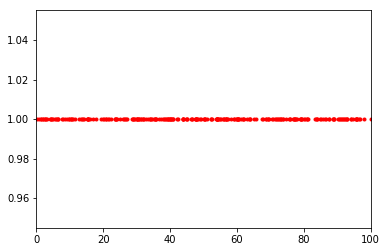

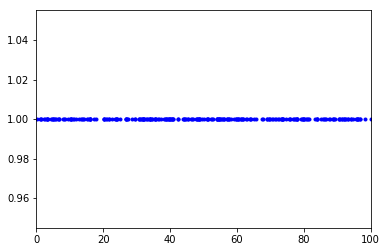

a) Tiempo medio de los clientes en el sistema:  0.2771168379090636
b) Tiempo medio de los clientes en la cola:  0.11570534296027796
c) Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  0.13352369769026495
d) Número máximo de clientes en el sistema:  7
e) Total de clientes que pasaron por el sistema:  252
f) Grafique el número de clientes en el sistema (eje Y) con respecto al tiempo (eje X).


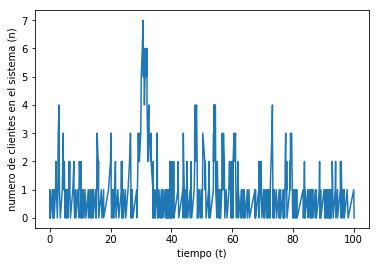

In [45]:
at = np.array(at)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()


print("a) Tiempo medio de los clientes en el sistema: ",t_med_sistema)
print("b) Tiempo medio de los clientes en la cola: ",t_med_cola)
print("c) Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("d) Número máximo de clientes en el sistema: ",max(an))
print("e) Total de clientes que pasaron por el sistema: ",NLL)
print("f) Grafique el número de clientes en el sistema (eje Y) con respecto al tiempo (eje X).")

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()


## 5.
Use su implementación del juego de la vida de Conway en NetLogo inicializando una reticula de 11 filas y 11 columnas con el siguiente patrón:

<img src="conway0.png" height="200" width="200">

**a)** Copie el código utilizado en NetLogo del juego de la vida de Conway.

In [ ]:
patches-own [
  living?         ;; indicates if the cell is living
  live-neighbors  ;; counts how many neighboring cells are alive
]

to setup-blank
  clear-all
  ask patches [ cell-death ]
  reset-ticks
end

to setup-random
  clear-all
  ;; ask patches
  ;;   [ ifelse random-float 100.0 < initial-density
  ;;     [ cell-birth ]
  ;;     [ cell-death ] ]
  ask patches [set pcolor white set living? false]
  ask patch 0 5 [set pcolor black set living? true]
  ask patch 1 4 [set pcolor black set living? true]
  ask patch -3 4 [set pcolor black set living? true]
  ask patch -1 2 [set pcolor black set living? true]
  ask patch 1 2 [set pcolor black set living? true]
  ask patch 5 2 [set pcolor black set living? true]
  ask patch -5 0 [set pcolor black set living? true]
  ask patch 0 0 [set pcolor black set living? true]
  ask patch 2 -1 [set pcolor black set living? true]
  ask patch 4 -1 [set pcolor black set living? true]
  ask patch 2 -2 [set pcolor black set living? true]
  ask patch 2 -3 [set pcolor black set living? true]
  ask patch -1 -2 [set pcolor black set living? true]
  ask patch -3 -2 [set pcolor black set living? true]
  ask patch -2 -3 [set pcolor black set living? true]
  ask patch 0 -5 [set pcolor black set living? true]
  reset-ticks
end

to cell-birth
  set living? true
  set pcolor fgcolor
end

to cell-death
  set living? false
  set pcolor bgcolor
end

to go
  ask patches
    [ set live-neighbors count neighbors with [living?] ]
  ;; Starting a new "ask patches" here ensures that all the patches
  ;; finish executing the first ask before any of them start executing
  ;; the second ask.  This keeps all the patches in synch with each other,
  ;; so the births and deaths at each generation all happen in lockstep.
  ask patches
    [ ifelse live-neighbors = 3
      [ cell-birth ]
      [ if live-neighbors != 2
        [ cell-death ] ] ]
  tick
end

to draw-cells
  let erasing? [living?] of patch mouse-xcor mouse-ycor
  while [mouse-down?]
    [ ask patch mouse-xcor mouse-ycor
      [ ifelse erasing?
        [ cell-death ]
        [ cell-birth ] ]
      display ]
end

**b)** Ilustre el patrón de la reticula en cada iteración hasta la numero 3.

**Iteración 1**
<img src="conway1.png" height="200" width="200">

**Iteración 2**
<img src="conway2.png" height="200" width="200">

**Iteración 3**
<img src="conway3.png" height="200" width="200">